<a href="https://colab.research.google.com/github/FJWangYantao/FJWangYantao.github.io/blob/main/Try_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.21014132]
 [ 1.8391602 ]
 [-1.0282753 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3,1),minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.8164762 ]
 [0.7063333 ]
 [0.17593849]], shape=(3, 1), dtype=float32)


In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.21331924],
       [ 1.3310966 ],
       [-0.98630506]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [ ]:
#使用GradientTape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
  gradient = tape.gradient(result,input_const)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position,time)
acceleration = outer_tape.gradient(speed,time)

In [3]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

In [4]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [5]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

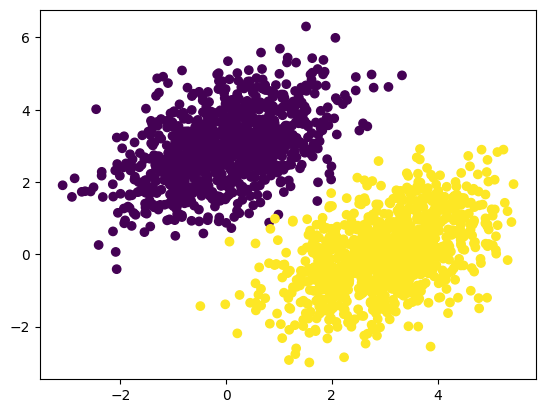

In [7]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])

plt.show()

In [16]:
import tensorflow as tf
input_dim=2
output_dim=1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [17]:
def model(inputs):
  return tf.matmul(inputs,W)+b

In [18]:
def square_loss(targets,predictions):
  per_sample_losses=tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_losses)

In [19]:
learning_rate = 0.1

def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets,predictions)
  grad_loss_wrt_W,grad_loss_wrt_b = tape.gradient(loss,[W,b])
  W.assign_sub(grad_loss_wrt_W*learning_rate)
  b.assign_sub(grad_loss_wrt_b*learning_rate)
  return loss


In [20]:
for step in range(40):
  loss = training_step(inputs,targets)
  print(f"Loss at step {step}:{loss:.4f}")

Loss at step 0:0.7483
Loss at step 1:0.1839
Loss at step 2:0.1082
Loss at step 3:0.0936
Loss at step 4:0.0869
Loss at step 5:0.0817
Loss at step 6:0.0769
Loss at step 7:0.0727
Loss at step 8:0.0687
Loss at step 9:0.0651
Loss at step 10:0.0618
Loss at step 11:0.0588
Loss at step 12:0.0560
Loss at step 13:0.0535
Loss at step 14:0.0512
Loss at step 15:0.0491
Loss at step 16:0.0471
Loss at step 17:0.0454
Loss at step 18:0.0437
Loss at step 19:0.0422
Loss at step 20:0.0409
Loss at step 21:0.0396
Loss at step 22:0.0385
Loss at step 23:0.0374
Loss at step 24:0.0365
Loss at step 25:0.0356
Loss at step 26:0.0348
Loss at step 27:0.0340
Loss at step 28:0.0334
Loss at step 29:0.0328
Loss at step 30:0.0322
Loss at step 31:0.0317
Loss at step 32:0.0312
Loss at step 33:0.0308
Loss at step 34:0.0304
Loss at step 35:0.0300
Loss at step 36:0.0297
Loss at step 37:0.0294
Loss at step 38:0.0291
Loss at step 39:0.0288


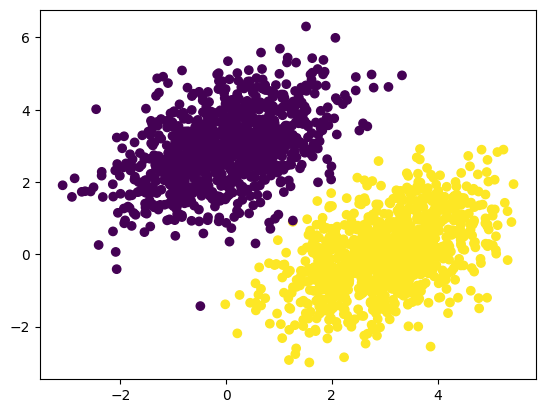

In [26]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],
            c=predictions[:,0] > 0.5)
plt.show()

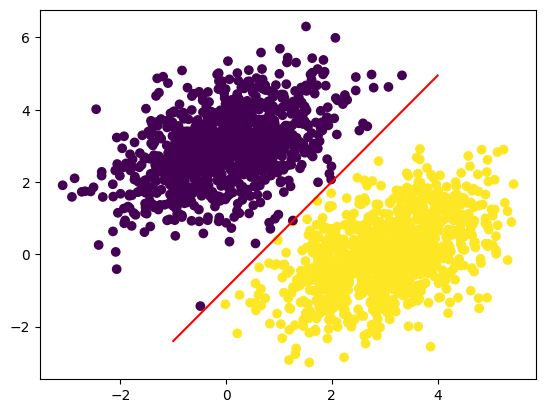

In [28]:
x = np.linspace(-1,4,100)
y = -W[0] / W[1] * x + (0.5-b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0],inputs[:,1],
            c=predictions[:,0] > 0.5)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.38635722], dtype=float32)>